<a href="https://colab.research.google.com/github/shreyrai99/ScrappingCOVID/blob/master/CovidTrackerIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable

url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()
state_data["Confirmed"] = state_data["Confirmed"].map(int)
state_data["Recovered"] = state_data["Recovered"].map(int)
state_data["Deceased"] = state_data["Deceased"].map(int)
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total",
               sum(state_data["Confirmed"]), 
               sum(state_data["Recovered"]),
               sum(state_data["Deceased"])])
print(table)


+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     11    |     10    |    0     |
|   2   |        Andhra Pradesh       |    572    |     36    |    14    |
|   3   |      Arunachal Pradesh      |     1     |     0     |    0     |
|   4   |            Assam            |     35    |     5     |    1     |
|   5   |            Bihar            |     83    |     37    |    1     |
|   6   |          Chandigarh         |     21    |     9     |    0     |
|   7   |         Chhattisgarh        |     36    |     23    |    0     |
|   8   |            Delhi            |    1640   |     51    |    38    |
|   9   |             Goa             |     7     |     6     |    0     |
|   10  |           Gujarat           |    1021   |     74    |    38    |
|   11  |           Harya

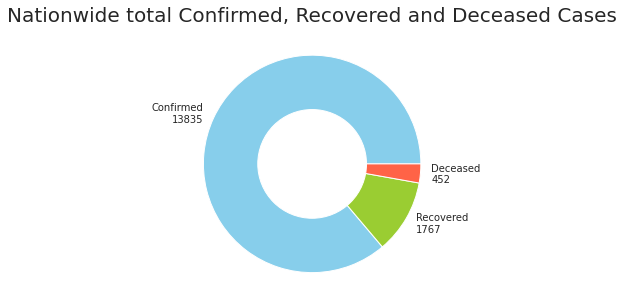

In [3]:
group_size = [sum(state_data['Confirmed']),
              sum(state_data['Recovered']),
              sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                'Recovered\n' + str(sum(state_data['Recovered'])),
                'Deceased\n' + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)
plt.show()

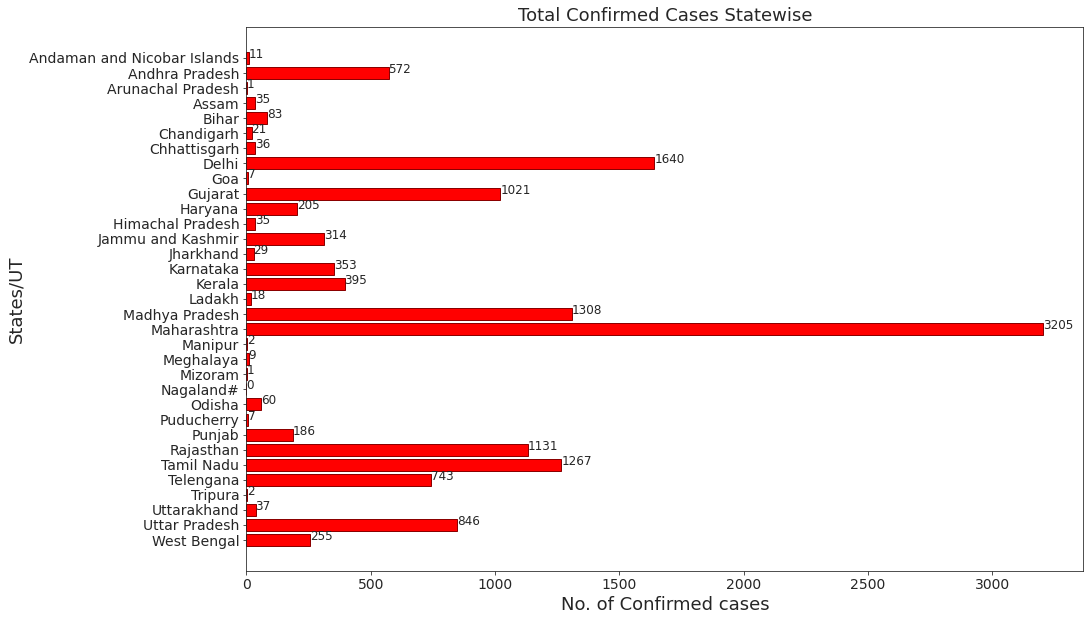

In [5]:
sns.set_style('ticks')
plt.figure(figsize = (15,10))
plt.barh(state_data['States/UT'],    state_data['Confirmed'].map(int),align = 'center', color = 'red', edgecolor = 'darkred')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()